## **Import Library**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense

## **Import Dataset**

In [3]:
df = pd.read_csv('Steel_Industry_data.csv')

## **Menampilkan Informasi dari Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

## **Menghapus atau Membersihkan Outlier Pada Dataset**

In [5]:
from scipy import stats

df = df[(np.abs(stats.zscore(df.select_dtypes(['int64' , 'float64']))) < 3).all(axis=1)]

## **Split Data**

In [7]:
X = df.drop(['WeekStatus'], axis=1) # Features
y = df['WeekStatus'] # Target

# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Normalisasi Data**

In [15]:
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [16]:
print(X_train.shape)
print(X_test.shape)

(27109, 7)
(6778, 7)


## **Membuat Model Sequential**

In [18]:
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                128       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Fungsi Callback**

In [20]:
from  keras.callbacks import EarlyStopping

## **Model Compile**

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## **Proses Training berserta penggunan Callback**

In [22]:
monitor_callback = EarlyStopping(monitor='val_accuracy', patience=10)

history = model.fit(
    x = X_train,
    y = y_train,
    epochs = 100,
    batch_size = 16,
    verbose = 1,
    validation_data = (X_test, y_test),
    callbacks = [monitor_callback]
)

Epoch 1/100
1695/1695 [==============================] - 3s 1ms/step - loss: 0.5231 - accuracy: 0.7424 - val_loss: 0.5095 - val_accuracy: 0.7555
Epoch 2/100
1695/1695 [==============================] - 2s 1ms/step - loss: 0.5012 - accuracy: 0.7611 - val_loss: 0.5023 - val_accuracy: 0.7597
Epoch 3/100
1695/1695 [==============================] - 2s 1ms/step - loss: 0.4935 - accuracy: 0.7673 - val_loss: 0.4976 - val_accuracy: 0.7623
Epoch 4/100
1695/1695 [==============================] - 2s 1ms/step - loss: 0.4894 - accuracy: 0.7709 - val_loss: 0.4964 - val_accuracy: 0.7636
Epoch 5/100
1695/1695 [==============================] - 2s 1ms/step - loss: 0.4862 - accuracy: 0.7731 - val_loss: 0.4900 - val_accuracy: 0.7744
Epoch 6/100
1695/1695 [==============================] - 2s 1ms/step - loss: 0.4832 - accuracy: 0.7766 - val_loss: 0.4956 - val_accuracy: 0.7676
Epoch 7/100
1695/1695 [==============================] - 2s 1ms/step - loss: 0.4815 - accuracy: 0.7786 - val_loss: 0.4928 - val_ac

## **Evaluasi Model**

In [25]:
model.evaluate(X_test, y_test)

212/212 [==============================] - 0s 924us/step - loss: 0.4743 - accuracy: 0.7834


[0.4742829203605652, 0.7834169268608093]

## **Grafik pergerakan metrik akurasi dan loss  pada training maupun validation**

### Accuracy Plot

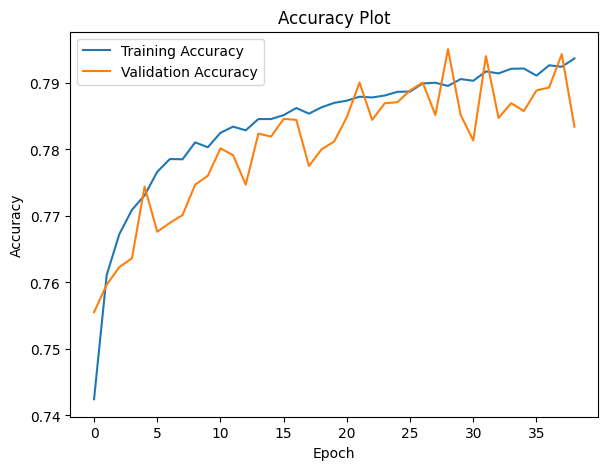

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Loss Plot

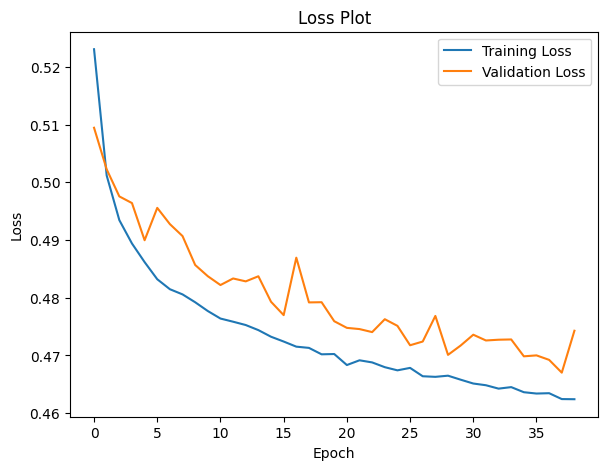

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()